In [1]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns; sns.set()
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,MinMaxScaler,LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,roc_curve,auc,roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV,cross_validate,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter(action='ignore')

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/FINAL/EMS2020final.xlsx' # Đường dẫn đã được cập nhật
data = pd.read_excel(file_path)

Mounted at /content/drive


In [3]:
def Missing_values(data):
    '''
    Find missing values of the dataframe.

    Parameters
    ----------
    data : DataFrame

    Returns
    -------
    None.
    Print a dataframe with missing values and their percentage.

    '''
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent], axis=1, keys=['Total', 'Pourcentage'])
    #Affiche que les variables avec des na
    print (missing_data[(percent > 0)],'\n' )

In [4]:
Missing_values(data)

          Total  Pourcentage
EBITIC      192     0.163127
OCFCAPEX    102     0.086661
EVR          10     0.008496
BPE          10     0.008496
SUPPAY        7     0.005947
EBITTA        2     0.001699
ASSETURN      2     0.001699
OCFTL         2     0.001699
LTDTA         1     0.000850
CR            1     0.000850
STDTA         1     0.000850
FL            1     0.000850 



In [5]:
data.reset_index(inplace=True,drop=True)

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None )

In [7]:
data_cap=data.copy()

In [8]:
from scipy import stats
def percentile_capping(data, cols, from_low_end, from_high_end):
  for col in cols:
    # lower_bound = data[col].quantile(from_low_end)
    # upper_bound = data[col].quantile(1- from_high_end)

    # data[col] = np.where(data[col] < from_low_end, lower_bound, data[col])
    # data[col] = np.where(data[col] > from_high_end, from_high_end, data[col])

    lower_bound = data[col].quantile(from_low_end)
    upper_bound = data[col].quantile(from_high_end)
    stats.mstats.winsorize(a = data[col], limits = [from_low_end, from_high_end], inplace = True)

In [9]:
percentile_capping(data_cap, ['WCTA','RETA','EBITTA','BVETL','ASSETURN','CR','STDTA','LTDTA','OCFCAPEX',	'EVR','MVETL','SUPPAY','BPE','OCFTL','FL','EBITIC'], 0.10, 0.10)

In [10]:
corr = data_cap.corr()
corr.style.background_gradient(cmap='coolwarm')

,MVETL,BVETL,WCTA,RETA,ASSETURN,SUPPAY,CR,STDTA,LTDTA,FL,EBITIC,OCFTL,EBITTA,OCFCAPEX,BPE,EVR,Financial Situation
MVETL,1.000000,0.790665,0.455878,0.122011,-0.113642,0.289931,0.633185,-0.446553,-0.259063,-0.544890,0.036337,0.396613,0.160780,0.052977,0.042390,0.365144,-0.433786
BVETL,0.790665,1.000000,0.561141,0.156184,-0.144144,0.356786,0.792221,-0.536634,-0.322227,-0.662379,0.017442,0.424940,0.046673,0.070021,-0.006183,0.203319,-0.505900
WCTA,0.455878,0.561141,1.000000,0.382535,0.130718,0.247951,0.821381,-0.419025,-0.402176,-0.432663,0.016755,0.298122,0.158294,0.053828,0.017977,-0.080912,-0.547240
RETA,0.122011,0.156184,0.382535,1.000000,0.299614,0.204560,0.251377,-0.274407,-0.226871,-0.205970,0.068540,0.294937,0.217103,-0.062410,-0.106911,-0.258818,-0.294646
ASSETURN,-0.113642,-0.144144,0.130718,0.299614,1.000000,0.299667,-0.066201,0.168399,-0.281129,0.084503,0.043089,0.202002,0.341250,-0.093088,-0.091658,-0.590584,-0.027651
SUPPAY,0.289931,0.356786,0.247951,0.204560,0.299667,1.000000,0.300185,-0.129121,-0.151383,-0.264116,-0.013567,0.293103,0.189334,-0.022153,-0.059875,-0.076357,-0.242536
CR,0.633185,0.792221,0.821381,0.251377,-0.066201,0.300185,1.000000,-0.505992,-0.265233,-0.502980,0.005627,0.353103,0.079239,0.082900,0.010781,0.130112,-0.500201
STDTA,-0.446553,-0.536634,-0.419025,-0.274407,0.168399,-0.129121,-0.505992,1.000000,0.047747,0.453200,-0.039499,-0.313193,-0.058380,-0.051746,0.062782,-0.162611,0.431412
LTDTA,-0.259063,-0.322227,-0.402176,-0.226871,-0.281129,-0.151383,-0.265233,0.047747,1.000000,0.240770,-0.024944,-0.147845,0.002210,-0.102214,0.048955,0.271174,0.249497
FL,-0.544890,-0.662379,-0.432663,-0.205970,0.084503,-0.264116,-0.502980,0.453200,0.240770,1.000000,-0.026867,-0.362072,-0.113672,-0.028383,0.061775,-0.162448,0.511187


In [11]:
y = data_cap['Financial Situation']
X = data_cap.drop(['Financial Situation'],axis=1)

In [12]:
data

,MVETL,BVETL,WCTA,RETA,ASSETURN,SUPPAY,CR,STDTA,LTDTA,FL,EBITIC,OCFTL,EBITTA,OCFCAPEX,BPE,EVR,Financial Situation
0,0.853487,0.984308,0.226528,0.090845,1.578338,8.453868,1.449502,0.001132,0.000000,2.015943,NaN,0.017392,0.091311,-0.212348,4.987880,0.230000,0
1,0.858655,0.885272,0.084395,0.112460,0.897338,11.599055,1.191690,0.343473,0.072017,2.129596,1.759657e+00,0.134759,0.042777,-1.183682,16.678152,0.870000,0
2,6.485533,4.375909,0.583502,0.048187,1.837086,12.259129,4.136853,0.024018,0.000000,1.228524,1.015552e+02,0.789974,0.302256,15.919515,5.074340,0.680000,0
3,0.565058,0.298177,0.109493,0.019867,0.749857,12.605449,1.152701,0.363121,0.053265,4.353710,6.919098e-01,-0.012980,0.016938,-3.293115,38.784160,1.140000,1
4,8.654086,6.518035,0.528159,0.029319,1.651023,31.185175,5.003452,0.067157,0.000000,1.153420,6.527879e+00,2.438841,0.031619,-9.829448,26.546300,0.690000,1
5,0.644269,0.734375,0.147362,0.064758,1.362467,6.762642,1.256043,0.160033,0.000000,2.361702,-1.324050e+01,0.278674,-0.086362,-102.425363,-3.848596,0.310000,0
6,0.231010,0.235476,0.023447,0.111284,1.355508,7.220276,1.030899,0.280508,0.050557,5.246720,1.764506e+00,0.015149,0.063227,-0.247957,9.683875,0.330000,1
7,0.733196,0.573712,-0.070380,0.025900,2.226258,86.560784,0.881468,0.514102,0.040491,2.743035,-3.536256e+00,0.349863,0.138877,-2.905549,5.141469,0.430000,1
8,0.226940,0.151175,0.105512,0.018858,2.830659,4.627969,1.121462,0.307694,0.000000,7.614856,1.875759e+00,0.024543,0.044656,NaN,13.532282,0.150000,1
9,14.497866,7.803319,0.094068,0.015474,0.361845,32.996277,1.828113,0.050320,0.000000,1.128151,1.902426e+01,0.246733,0.136869,12.792060,15.084407,4.800000,0


In [13]:
data.dtypes

,0
MVETL,float64
BVETL,float64
WCTA,float64
RETA,float64
ASSETURN,float64
SUPPAY,float64
CR,float64
STDTA,float64
LTDTA,float64
FL,float64


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True)

In [15]:
pipeline = Pipeline([('imp',SimpleImputer(strategy='mean')),
                     ('pca',PCA(n_components='mle')),
                    ('scl',RobustScaler()),
                    ('logreg',LogisticRegression(max_iter=10000, tol=0.1))])

In [16]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('imp', SimpleImputer()), ('pca', PCA(n_components='mle')),
                ('scl', RobustScaler()),
                ('logreg', LogisticRegression(max_iter=10000, tol=0.1))])

In [17]:
pred = pipeline.predict(X_test)
pred_proba = pipeline.predict_proba(X_test)

In [18]:
y_test.iloc[200]

1

In [19]:
x_200 = X_test.iloc[200]
x_200_array = x_200.values.reshape(1,-1)

In [20]:
pipeline.predict_proba(x_200_array)

array([[0.11053239, 0.88946761]])

In [21]:
def PlotROC(tpr,fpr,auc,size=10,linewidth=2):
    plt.figure(figsize=(size,size))
    plt.plot(fpr,tpr,color='darkorange',
         lw=linewidth, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0,1],[0,1],color='navy', lw=linewidth, linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [22]:
def GetRocCurve(y_true,y_proba):
    auc = roc_auc_score(y_true,y_proba)
    fpr, tpr,_ = roc_curve(y_true,y_proba)
    return fpr, tpr, auc

In [23]:
def PlotConfusionMatrix(y_true,y_prediction):
    conf = confusion_matrix(y_true,y_prediction)
    crosstable = pd.crosstab(y_true, y_prediction, colnames=['Predicted Label'],rownames=['True Label'])
    sns.set(font_scale=1.4)
    sns.heatmap(crosstable, annot=True, annot_kws={"size":16},fmt='g',cmap='Blues')

In [24]:
fpr, tpr, auc = GetRocCurve(y_test,pred_proba[:,1])

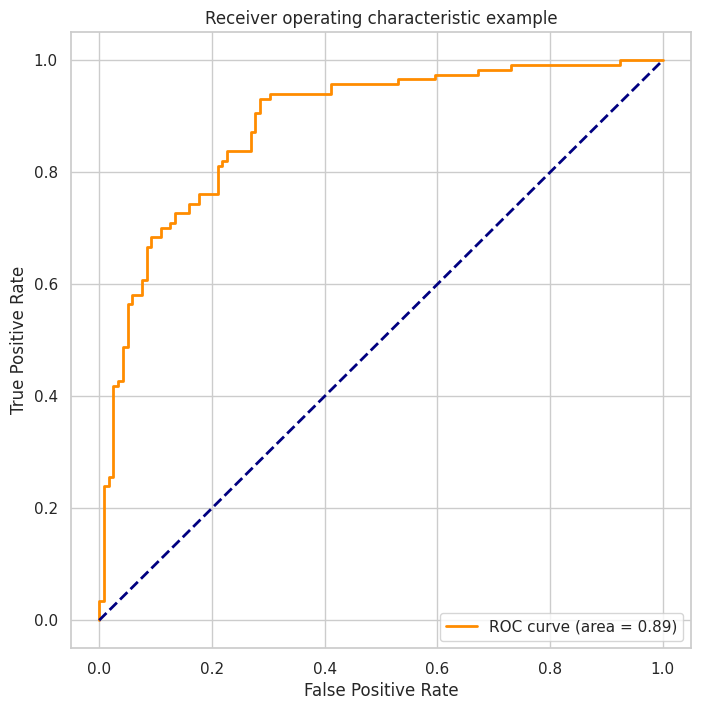

In [25]:
PlotROC(tpr,fpr,auc,8,2)

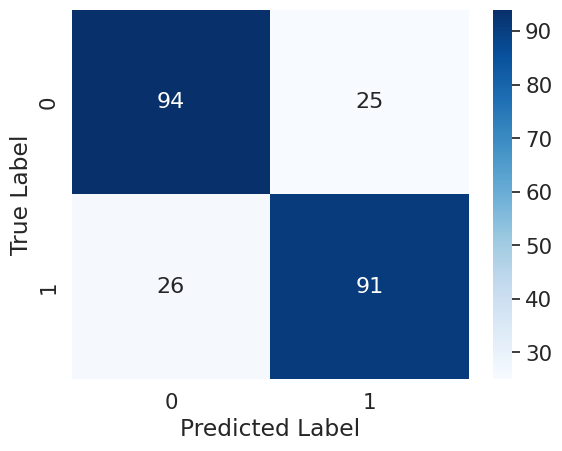

In [26]:
PlotConfusionMatrix(y_test,pred)

In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       119
           1       0.78      0.78      0.78       117

    accuracy                           0.78       236
   macro avg       0.78      0.78      0.78       236
weighted avg       0.78      0.78      0.78       236



# GridSearch

In [28]:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logreg__C': np.logspace(-4, 4, 4),}

In [29]:
grid = GridSearchCV(pipeline, param_grid, n_jobs=-1,cv=10,verbose=3,scoring='roc_auc')
scores = grid.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


In [30]:
scores.best_score_

0.8788596154829472

In [31]:
scores.best_params_

{'logreg__C': 21.54434690031882, 'pca__n_components': 15}

# CrossValidation

In [32]:
pipeline2 = Pipeline([('imp',SimpleImputer(strategy='mean')),
                     ('pca',PCA(n_components=8)),
                    ('scl',RobustScaler()),
                    ('logreg',LogisticRegression(max_iter=10000, tol=0.1, C=10000.0))])

In [33]:
cv_results = cross_validate(pipeline2, X_train, y_train, cv=10, verbose=2, n_jobs=-1,scoring='roc_auc')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished


In [34]:
cv_results

{'fit_time': array([0.06804371, 0.04531503, 0.04944205, 0.05801845, 0.05921197,
        0.06530929, 0.05510283, 0.06071568, 0.03065991, 0.03463674]),
 'score_time': array([0.01125216, 0.01241517, 0.01070523, 0.01636171, 0.013345  ,
        0.01086617, 0.01448512, 0.01081443, 0.00853634, 0.00604749]),
 'test_score': array([0.81616983, 0.83617119, 0.87962963, 0.85462963, 0.90462963,
        0.82546296, 0.78425926, 0.84537037, 0.88148148, 0.85833333])}

In [35]:
np.mean(cv_results['test_score'])

0.8486137316561845

# Refit

In [36]:
pipeline2.fit(X_train,y_train)

Pipeline(steps=[('imp', SimpleImputer()), ('pca', PCA(n_components=8)),
                ('scl', RobustScaler()),
                ('logreg',
                 LogisticRegression(C=10000.0, max_iter=10000, tol=0.1))])

In [37]:
pred_proba2 = pipeline2.predict_proba(X_test)
pred2 = pipeline2.predict(X_test)

In [38]:
fpr2, tpr2, auc2 = GetRocCurve(y_test,pred_proba2[:,1])

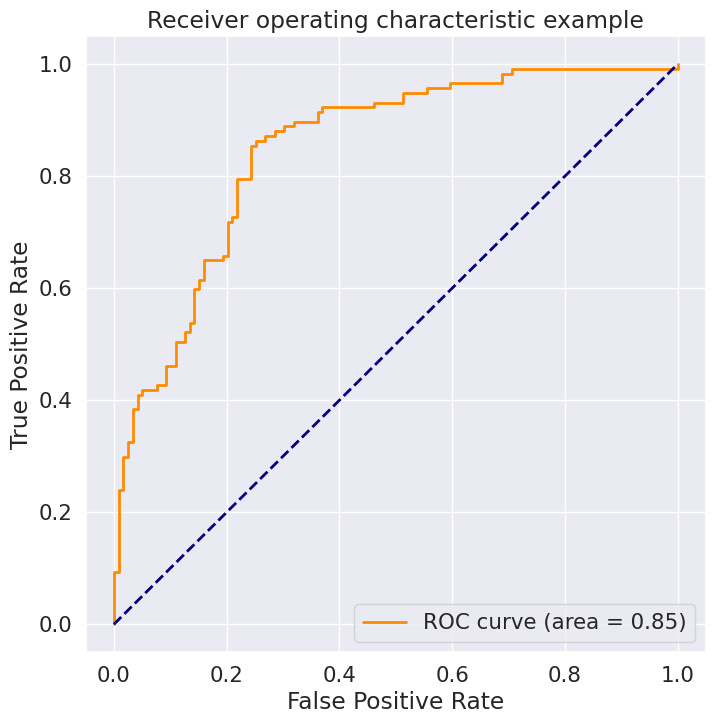

In [39]:
PlotROC(tpr2,fpr2,auc2,8,2)

In [40]:
def PlotConfusionMatrix(y_true,y_prediction):
    conf = confusion_matrix(y_true,y_prediction)
    crosstable = pd.crosstab(y_true, y_prediction, colnames=['Predicted Label'],rownames=['True Label'])
    sns.set(font_scale=1.4)
    sns.heatmap(crosstable, annot=True, annot_kws={"size":16},fmt='g',cmap='Blues')

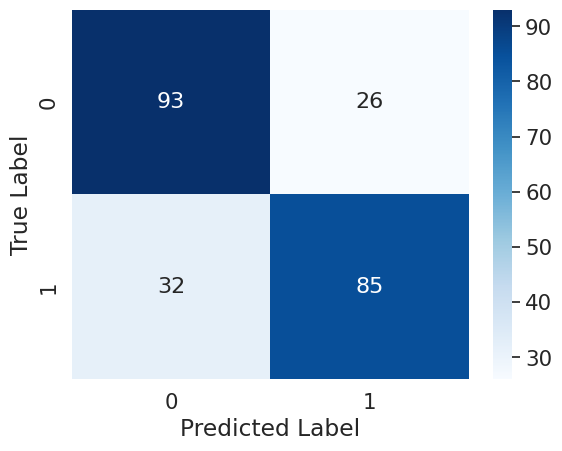

In [41]:
PlotConfusionMatrix(y_test,pred2)

In [42]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       119
           1       0.77      0.73      0.75       117

    accuracy                           0.75       236
   macro avg       0.75      0.75      0.75       236
weighted avg       0.75      0.75      0.75       236

